<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Test-runs" data-toc-modified-id="Test-runs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Test runs</a></span></li><li><span><a href="#Interact" data-toc-modified-id="Interact-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Interact</a></span></li><li><span><a href="#Parameter-sweep" data-toc-modified-id="Parameter-sweep-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parameter sweep</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.cell_models import cell_v1

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, interact_manual

from statsmodels.tsa.stattools import acf

from scipy.signal import find_peaks

In [3]:
from src.plot_utils import plot_vars_vs_time, plot_phase_RB, plot_phase_RBc, plot_autocorrelations

In [37]:
from src.analysis import get_cycle_stats

In [4]:
def f(x):
    return x

In [5]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

# Test runs

Build something with interact so that you can get a rough sense of how the system behaves. 

In [72]:
def run_and_plot_test(
    alpha=2, beta0=3, delta=1, 
    gamma=.9, epsilon=.01, dt=1e-3, 
    division="timer", transition="size", 
    time_SG2=1e-1, transition_th=2.
):
    
    cell = cell_v1(
        alpha=alpha, beta0=beta0, delta=delta, 
        gamma=gamma, epsilon=epsilon, dt=dt, 
        division=division, transition=transition, 
        time_SG2=time_SG2, transition_th=transition_th
    )
    
    T=8000
    cell.grow(T)
    
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    t_vec = np.arange(T+1)

    plot_vars_vs_time(ax[0,0], cell)
    plot_phase_RB(ax[1,0], cell)
    plot_phase_RBc(ax[1,1], cell)
    
    periods = plot_autocorrelations(ax[0,1], cell, nlags=4000, prominence=0)
    if any([p is None for p in periods]):
        print("Not periodic")
    else:
        if np.std(periods)/np.mean(periods) < .05:
            print(f"All signals with period approx. {np.mean(periods)}.")
        else:
            print("Not periodic")
    
    return cell, periods

Params check not implemented
All signals with period approx. 770.5.


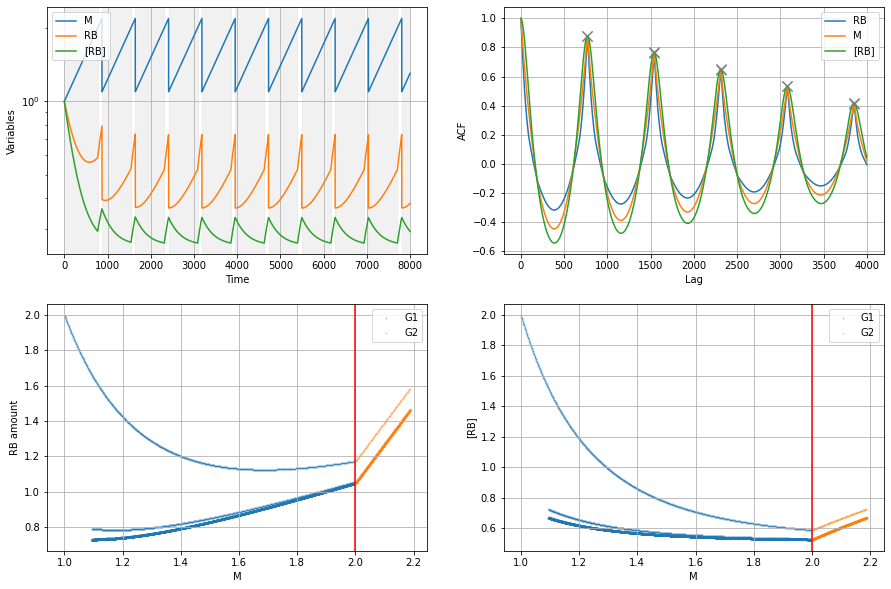

In [21]:
cell_test, periods= run_and_plot_test()

In [33]:
cycle_ids = [1]
crt_cycle = 1
for k in range(1, len(cell_test.phase_hist)):
    if cell_test.phase_hist[k]=="G1" and cell_test.phase_hist[k-1]=="G2":
        crt_cycle+=1
    cycle_ids.append(crt_cycle)

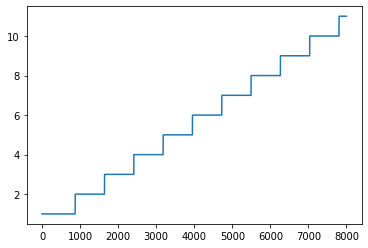

In [34]:
plt.plot(cycle_ids)

# Interact

In [22]:
step=.1

In [73]:
interact_manual(
    run_and_plot_test, 
    alpha=(.1, 10., step), beta0=(.1, 10, step), epsilon=(.1, 1., step), gamma=(.1, 1), 
    time_SG2 = (1e-2, 1), transition_th=(.1, 3, .1), delta=fixed(1.),
    dt=fixed(1e-3), division=fixed("timer"), transition=fixed("size")
);

interactive(children=(FloatSlider(value=2.0, description='alpha', max=10.0, min=0.1), FloatSlider(value=3.0, d…

# Parameter sweep

In [65]:
from itertools import product

In [71]:
for i,j in product(range(2), np.arange(.4, 3.1, .6)):
    print(i,j)

0 0.4
0 1.0
0 1.6
0 2.1999999999999997
0 2.8
1 0.4
1 1.0
1 1.6
1 2.1999999999999997
1 2.8


In [81]:
# run a parameter sweep
T=8000
division="timer"
transition="size"
dt=1e-3
time_SG2 = .3
delta=1.

alpha_vals = np.arange(.1, 5., .5)
beta_vals = np.arange(.1, 5., .5)
epsilon_vals = np.arange(.1, 1, .2)
gamma_vals = np.arange(.1, 2, .3)
transition_th_vals = np.arange(.5, 3, .2)

In [83]:
stats_tot = dict()
for alpha, beta0, epsilon, gamma, transition_th in product(
    alpha_vals, beta_vals, epsilon_vals, gamma_vals, transition_th_vals
):

    cell = cell_v1(alpha=alpha, beta0=beta0, delta=delta, 
            gamma=gamma, epsilon=epsilon, dt=dt, 
            division=division, transition=transition, 
            time_SG2=time_SG2, transition_th=transition_th)


    cell.grow(T)
    
    stats_crt = get_cycle_stats(cell)
    stats_tot[(alpha, beta0, epsilon, gamma, transition_th)] = stats_crt

In [86]:
import pickle

In [ ]:
with open('mypickle.pickle', 'wb') as f:
    pickle.dump(some_obj, f)